In [100]:
global lvls
global language
language='ENG'

In [101]:
import sqlite3
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

class Person:
    def __init__(self, name, age, lvl, gender):
        self.name = name
        self.age = age
        self.lvl = lvl
        self.gender = gender
    
    def __str__(self):
        return f"{self.name}, {self.age} years old, {self.lvl}, {self.gender}"
    

Макс длина послед-ти: 101


Text(0, 0.5, 'Вероятность')

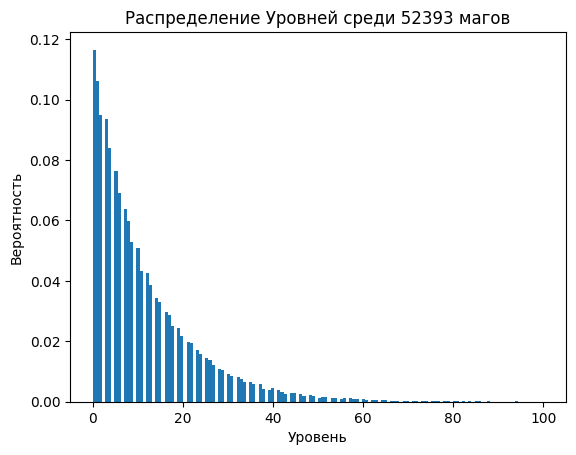

In [102]:
def sequence(mas): # Выводит последний элемент списка, находящийся внутри последовательности натуральных чисел, состоящих из уникальных чисел
       mas=list(set(mas))
       mas.sort()
       for i in range(len(mas)):
              if i!=mas[i]:
                     return mas[i-1]
       return i


#Создание распределенных по exp() чисел от 0 до 100
checker=-1
# size_rand=10000
size_rand=40000
while checker<100:
       r = expon.rvs(size=size_rand)*12
       lvls=list(map(int,r))
       checker=sequence(lvls)
       size_rand+=100
       # print('------')
       # print(max(lvls))
print(f"Макс длина послед-ти: {checker}")

#Ограничение распределение до 100 lvl.
def minus100(x):
       if x<=100:
              return True
       else:
              return False
lvls=[i for i in filter(minus100, lvls)]


#Построение графика
fig, ax = plt.subplots(1, 1)
ax.hist(lvls, density=True, bins='auto')
plt.title(f'Распределение Уровней среди {len(lvls)} магов')
plt.xlabel('Уровень')
plt.ylabel('Вероятность')

In [103]:
#Распределение по десяткам
def find_n(x,n=2):
    if x>=10*(n-1) and x<10*n:
        return True
    else:
        return False
for q in range(1,11):
    seqs=[i for i in filter(lambda seq: find_n(seq,n=q), lvls)] #lambda нужна чтобы вставить в вызывающуюся фукнцию дополнительную переменную (обычно filter не позволяет это сделать)
    print(f"heroes in range from {10*(q-1)} to {10*(q)}: {len(seqs)}")

heroes in range from 0 to 10: 29741
heroes in range from 10 to 20: 12747
heroes in range from 20 to 30: 5662
heroes in range from 30 to 40: 2429
heroes in range from 40 to 50: 1056
heroes in range from 50 to 60: 432
heroes in range from 60 to 70: 184
heroes in range from 70 to 80: 86
heroes in range from 80 to 90: 38
heroes in range from 90 to 100: 17


In [104]:
def GeneratorPersons(nums=1,stage=-1):
    import random
    from pynames import GENDER, LANGUAGE
    from pynames.generators.elven import DnDNamesGenerator

    elven_generator = DnDNamesGenerator()   

    #primary data
    genders=['Male','Female']

    ages=[]
    mas=[i for i in range(15,20)]
    ages.append(mas)
    mas=[i for i in range(20,25)]
    ages.append(mas)
    mas=[i for i in range(25,30)]
    ages.append(mas)
    mas=[i for i in range(30,35)]
    ages.append(mas)
    mas=[i for i in range(35,40)]
    ages.append(mas)
    mas=[i for i in range(40,60)]
    ages.append(mas)
    weights=[0]*6
    weights=[0.1,0.2,0.2,0.3,0.1,0.1]

    classes=['Воин','Маг','Рейнджер','Медик','Уникальный','Охотник']
    weights_cl=[4,10,1,1,2,1,]

    data=[]

    for c in range(nums):
        #GENDER
        gender=random.choices(genders, weights=[0.4,0.6],k=1)
        gender=gender[0]
        #NAME
        if gender=='Male':
            name=elven_generator.get_name_simple(GENDER.MALE)
        else:
            name=elven_generator.get_name_simple(GENDER.FEMALE)

        #LVL
        lvl=random.choice(lvls)

        #AGE
        age_stage=random.choices(ages, weights=weights,k=1)
        age_stage=age_stage[0]
        age=random.choice(age_stage)

        #CLASSES

        p_class=random.choices(classes, weights=weights_cl,k=1)
        p_class=p_class[0]
        # Считывание данных и создание объекта Person
        person=[name,age,lvl,gender,p_class]
        data.append(person)
        
    return data

In [105]:

data=[]


In [106]:

data.append(GeneratorPersons(nums=10000))

In [107]:
data=data[0]
# print(data)

In [108]:
import pandas as pd
df=pd.DataFrame(data,columns=['Name','Age','LvL','Gender','Pclass'])

In [109]:
df

,Name,Age,LvL,Gender,Pclass
0,Amaran,21,10,Male,Воин
1,Firsaliess,21,8,Male,Уникальный
2,Duonal,35,0,Male,Рейнджер
3,Selsal,38,4,Male,Маг
4,Laoroor,33,1,Female,Уникальный
...,...,...,...,...,...
9995,odar'Siyailam,33,16,Male,Уникальный
9996,Nyumil,26,17,Female,Рейнджер
9997,Corvaindeth,26,2,Female,Маг
9998,Alyaodar,37,6,Female,Рейнджер


In [110]:
df[df.LvL>80]

,Name,Age,LvL,Gender,Pclass
78,ather'Maraaselral,27,100,Female,Маг
1806,Pynine,33,97,Female,Медик
2002,Garllae,32,95,Male,Уникальный
4881,Saeianavain,28,81,Male,Уникальный
4963,Lyahel,26,85,Female,Рейнджер
5201,Myitas,19,85,Male,Уникальный
6529,Tiaumilihel,32,84,Female,Маг
8028,ess'Ruselia,37,81,Female,Уникальный


In [123]:
ll={'Воин':1}
# for i in ll:
#     print(i)

1